In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Remove unnecessary columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Step 2: Normalize the dataset to 3NF
# Table 1: Passenger Information
passenger_info = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

# Table 2: Survival Information
survival_info = data[['PassengerId', 'Survived']]

# Table 3: Fare Information
fare_info = data[['PassengerId', 'Fare']]

# Save or display the tables
passenger_info.to_csv('passenger_info.csv', index=False)
survival_info.to_csv('survival_info.csv', index=False)
fare_info.to_csv('fare_info.csv', index=False)

# Display the first few rows of each table
print("Passenger Information Table:")
print(passenger_info.head())

print("\nSurvival Information Table:")
print(survival_info.head())

print("\nFare Information Table:")
print(fare_info.head())

Passenger Information Table:
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0            1       3    male  22.0      1      0        S
1            2       1  female  38.0      1      0        C
2            3       3  female  26.0      0      0        S
3            4       1  female  35.0      1      0        S
4            5       3    male  35.0      0      0        S

Survival Information Table:
   PassengerId  Survived
0            1         0
1            2         1
2            3         1
3            4         1
4            5         0

Fare Information Table:
   PassengerId     Fare
0            1   7.2500
1            2  71.2833
2            3   7.9250
3            4  53.1000
4            5   8.0500


In [5]:
import sqlite3
import pandas as pd

file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Normalize the dataset
passenger_info = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
survival_info = data[['PassengerId', 'Survived']]
fare_info = data[['PassengerId', 'Fare']]

# Connect to SQLite database
conn = sqlite3.connect('titanic.db')

# Check if tables exist
query_check = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_check, conn)
print("Existing tables:", tables)

# Create tables if they don't exist
if 'passenger_info' not in tables.values:
    passenger_info.to_sql('passenger_info', conn, if_exists='replace', index=False)
if 'survival_info' not in tables.values:
    survival_info.to_sql('survival_info', conn, if_exists='replace', index=False)
if 'fare_info' not in tables.values:
    fare_info.to_sql('fare_info', conn, if_exists='replace', index=False)

# Define the SQL join query
query = """
SELECT
    passenger_info.PassengerId,
    passenger_info.Pclass,
    passenger_info.Sex,
    passenger_info.Age,
    passenger_info.SibSp,
    passenger_info.Parch,
    passenger_info.Embarked,
    survival_info.Survived,
    fare_info.Fare
FROM
    passenger_info
JOIN
    survival_info
ON
    passenger_info.PassengerId = survival_info.PassengerId
JOIN
    fare_info
ON
    passenger_info.PassengerId = fare_info.PassengerId;
"""

# Execute the query and load the data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())


Existing tables: Empty DataFrame
Columns: [name]
Index: []
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked  Survived     Fare
0            1       3    male  22.0      1      0        S         0   7.2500
1            2       1  female  38.0      1      0        C         1  71.2833
2            3       3  female  26.0      0      0        S         1   7.9250
3            4       1  female  35.0      1      0        S         1  53.1000
4            5       3    male  35.0      0      0        S         0   8.0500


In [6]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split


# Display the first few rows of the DataFrame
print("Data Overview:")
print(df.head())

# Check for stratification need
print("\nSurvived Value Counts:")
print(df['Survived'].value_counts())

# Perform train/test split
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Stratify by 'Survived' to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the split results
print("\nTrain/Test Split:")
print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Data Overview:
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked  Survived     Fare
0            1       3    male  22.0      1      0        S         0   7.2500
1            2       1  female  38.0      1      0        C         1  71.2833
2            3       3  female  26.0      0      0        S         1   7.9250
3            4       1  female  35.0      1      0        S         1  53.1000
4            5       3    male  35.0      0      0        S         0   8.0500

Survived Value Counts:
Survived
0    549
1    342
Name: count, dtype: int64

Train/Test Split:
Training Set Size: 712
Testing Set Size: 179


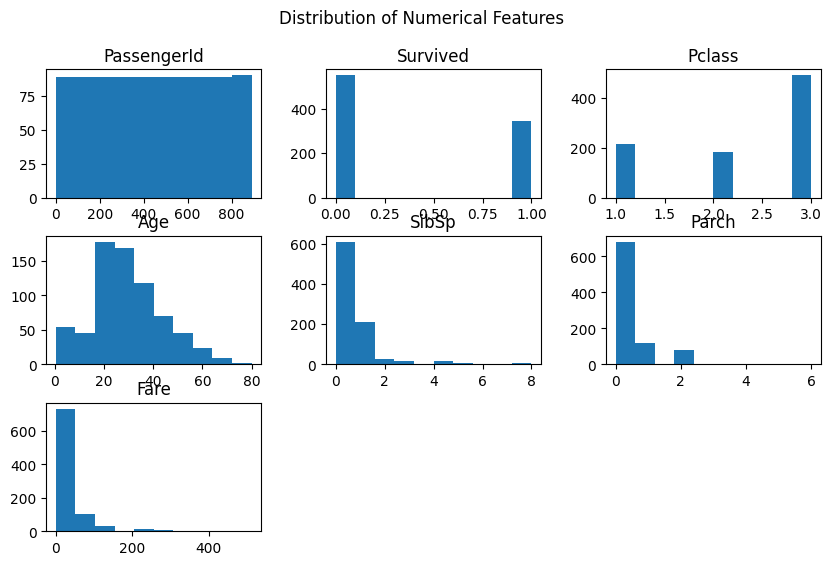

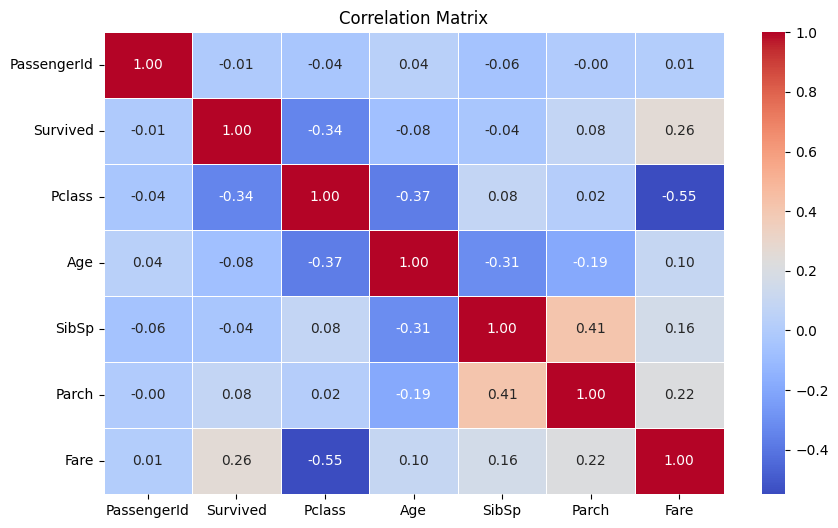

Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is already loaded as a DataFrame
df = pd.DataFrame(data)

# 1. Data Profiling - Summary Statistics
summary_stats = df.describe(include='all')  # Include all columns for summary stats

# 2. Missing Values
missing_values = df.isnull().sum()

# 3. Distribution of Numerical Features (using histograms)
numerical_columns = df.select_dtypes(include=['number']).columns  # Select only numerical columns
df[numerical_columns].hist(bins=10, figsize=(10, 6), grid=False)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# 4. Correlation Matrix
correlation_matrix = df[numerical_columns].corr()  # Only consider numerical columns

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 5. Outliers and Capping (using the 95th percentile for 'Fare')
if 'Fare' in df.columns:
    fare_95th_percentile = df['Fare'].quantile(0.95)
    df['Capped_Fare'] = df['Fare'].apply(lambda x: min(x, fare_95th_percentile))

# 6. Train/Test Split
train_df = df.sample(frac=0.8, random_state=42)  # 80% for training
test_df = df.drop(train_df.index)  # 20% for testing

# Display results
print(f"Summary Statistics:\n{summary_stats}")
print(f"Missing Values:\n{missing_values}")
if 'Fare' in df.columns:
    print(f"95th Percentile for Fare: {fare_95th_percentile}")
print(f"Training Set Size: {train_df.shape[0]}")
print(f"Testing Set Size: {test_df.shape[0]}")


In [8]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
!mkdir -p data
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  !mv "Titanic-Dataset.csv" data/

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


In [ ]:
# Install the DagsHub python client
!pip install -q dagshub


In [ ]:
import dagshub
dagshub.init(repo_owner='cheepuripalli.sharmiladevi', repo_name='titanic', mlflow=True)


Initialized MLflow to track repo "cheepuripalli.sharmiladevi/titanic"

Repository cheepuripalli.sharmiladevi/titanic initialized!

In [ ]:
#EXPERIMENT-1
from sklearn.impute import SimpleImputer

# Update column transformations to include imputation
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the updated pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Rerun the training and cross-validation
with mlflow.start_run():
    # Log the model parameters
    mlflow.log_param("scaler", "MinMaxScaler")
    mlflow.log_param("classifier", "LogisticRegression")

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

    # Log cross-validation results
    mlflow.log_metric("cv_mean_f1", cv_scores.mean())
    mlflow.log_metric("cv_std_f1", cv_scores.std())

    # Train model on the entire training set
    pipeline.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Log test set results
    mlflow.log_metric("test_f1", f1)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)

    # Log the model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_model")

# Print results
print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
print("Test F1-score:", f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2024/12/21 01:49:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run mercurial-dove-784 at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/2f9b1d85b04d418cabd1afd716e5832c
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1
Cross-validation F1-score (mean/std): 0.7293352136896858 / 0.04117893855243745
Test F1-score: 0.7131782945736435
Confusion Matrix:
[[96 14]
 [23 46]]


In [ ]:
pip install --upgrade xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Prepare features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Handle missing values separately for numerical and categorical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Fill missing values in numerical features with the mean
X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing values in categorical features with "Missing"
X[categorical_features] = X[categorical_features].fillna("Missing")

# Notify the user that missing values are handled
print("Missing values handled successfully. Proceeding with training.")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.head())
# Define transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_2_Titanic_Classifiers")

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        # Create the pipeline for each classifier
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        try:
            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")


Missing values handled successfully. Proceeding with training.
     Pclass     Sex        Age  SibSp  Parch Embarked      Fare
692       3    male  29.699118      0      0        S   56.4958
481       2    male  29.699118      0      0        S    0.0000
527       1    male  29.699118      0      0        S  221.7792
855       3  female  18.000000      0      1        S    9.3500
801       2  female  31.000000      1      1        S   26.2500


2024/12/21 05:48:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7357361595755695 / 0.04209600649939632
Test F1-score: 0.7142857142857143
Confusion Matrix:
[[98 12]
 [24 45]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/cf6a9f39494e4609847b657e7afac4a9
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


2024/12/21 05:48:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.7237658727193618 / 0.043686057589737225
Test F1-score: 0.734375
Confusion Matrix:
[[98 12]
 [22 47]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/1070edefe5bf4fbda4930504cc901926
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


2024/12/21 05:49:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7279565819980813 / 0.04270321306201722
Test F1-score: 0.75
Confusion Matrix:
[[99 11]
 [21 48]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/4baebf912a0e4677a1c7c3f48ddace38
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn


X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Feature Engineering: Combine SibSp and Parch into a single 'FamilySize' attribute
X['FamilySize'] = X['SibSp'] + X['Parch']
X = X.drop(columns=['SibSp', 'Parch'])
print(X.head())

# Handle missing values
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Fill missing values in numerical features with the mean
X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing values in categorical features with "Missing"
X[categorical_features] = X[categorical_features].fillna("Missing")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define transformations
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_3_Titanic_Feature_Engineering")

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        # Create the pipeline for each classifier
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        try:
            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")


   Pclass     Sex   Age Embarked     Fare  FamilySize
0       3    male  22.0        S   7.2500           1
1       1  female  38.0        C  71.2833           1
2       3  female  26.0        S   7.9250           0
3       1  female  35.0        S  53.1000           1
4       3    male  35.0        S   8.0500           0


2024/12/21 05:52:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7353908987168315 / 0.03176872635171701
Test F1-score: 0.71875
Confusion Matrix:
[[97 13]
 [23 46]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2/runs/93a4445599c143009fa0e2b45e505839
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2


2024/12/21 05:52:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.7251264169370488 / 0.04162616667702784
Test F1-score: 0.7244094488188977
Confusion Matrix:
[[98 12]
 [23 46]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2/runs/bf915da98a194cf290564e7ff06f5376
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2


2024/12/21 05:52:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7274716978362796 / 0.04713919588641726
Test F1-score: 0.7480916030534351
Confusion Matrix:
[[97 13]
 [20 49]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2/runs/365d58519423463aaf81dc7e7e35e3b3
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn


X = df.drop(columns=['Survived', 'PassengerId'],axis=1)
y = df['Survived']

# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Handle missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
X[categorical_features] = X[categorical_features].fillna("Missing")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.head())
# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.01)

# Correlation Threshold (manually computed)
correlation_matrix = X_train[numerical_features].corr()
correlated_features = set()
correlation_threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

# SelectKBest based on mutual information
select_k_best = SelectKBest(score_func=mutual_info_classif, k=5)

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_4_Titanic_Feature_Selection")

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        try:
            # Create the pipeline for each classifier
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('variance', variance_selector),
                ('selectkbest', select_k_best),
                ('classifier', model)
            ])

            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")

     Pclass     Sex        Age  SibSp  Parch Embarked      Fare
692       3    male  29.699118      0      0        S   56.4958
481       2    male  29.699118      0      0        S    0.0000
527       1    male  29.699118      0      0        S  221.7792
855       3  female  18.000000      0      1        S    9.3500
801       2  female  31.000000      1      1        S   26.2500


2024/12/21 05:55:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7190577087239229 / 0.035532186360926886
Test F1-score: 0.7121212121212122
Confusion Matrix:
[[94 16]
 [22 47]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3/runs/f3bdd70e7250495bb2ad93089be837f1
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3


2024/12/21 05:55:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.7136902412109029 / 0.04342089842269947
Test F1-score: 0.696969696969697
Confusion Matrix:
[[93 17]
 [23 46]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3/runs/91c0bf7280704949847ecef974de207c
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3


2024/12/21 05:56:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7467330433992424 / 0.07384879713430405
Test F1-score: 0.7794117647058824
Confusion Matrix:
[[96 14]
 [16 53]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3/runs/cf1848d6e1c0471b8090c0e84be951fe
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/3


In [ ]:
00import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

2024/12/21 04:01:55 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_5_Titanic_PCA' does not exist. Creating a new experiment.


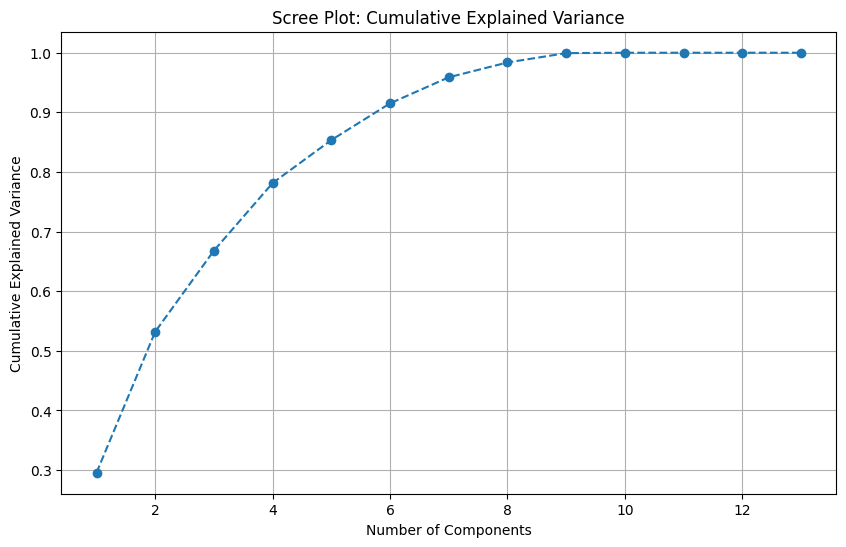

Number of components selected: 7


2024/12/21 04:02:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7270817798427054 / 0.05117745242947035
Test F1-score: 0.72
Confusion Matrix:
[[99 11]
 [24 45]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4/runs/873c9373aaa641e8bdd5bed8d3b044bc
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4


2024/12/21 04:02:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.7176650313507228 / 0.05275947574316234
Test F1-score: 0.71875
Confusion Matrix:
[[97 13]
 [23 46]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4/runs/2d28e79377c7487cb4e75c15231e42e0
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4


2024/12/21 04:02:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7221157040024965 / 0.046739842752710016
Test F1-score: 0.7086614173228346
Confusion Matrix:
[[97 13]
 [24 45]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4/runs/7d3879e26f6842fca43da55f22194fed
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/4


In [ ]:
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Handle missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
X[categorical_features] = X[categorical_features].fillna("Missing")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# PCA
pca = PCA()

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_5_Titanic_PCA")

# Preprocess the training data
pipeline_preprocess = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_transformed = pipeline_preprocess.fit_transform(X_train)

# Fit PCA on the transformed training data
pca.fit(X_train_transformed)

# Create a scree plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Select components explaining at least 95% of the variance
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components selected: {n_components}")

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        try:
            # Create the pipeline for each classifier
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('pca', PCA(n_components=n_components)),
                ('classifier', model)
            ])

            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_param("n_components", n_components)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")

2024/12/21 04:07:22 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_6_Custom_Combined' does not exist. Creating a new experiment.


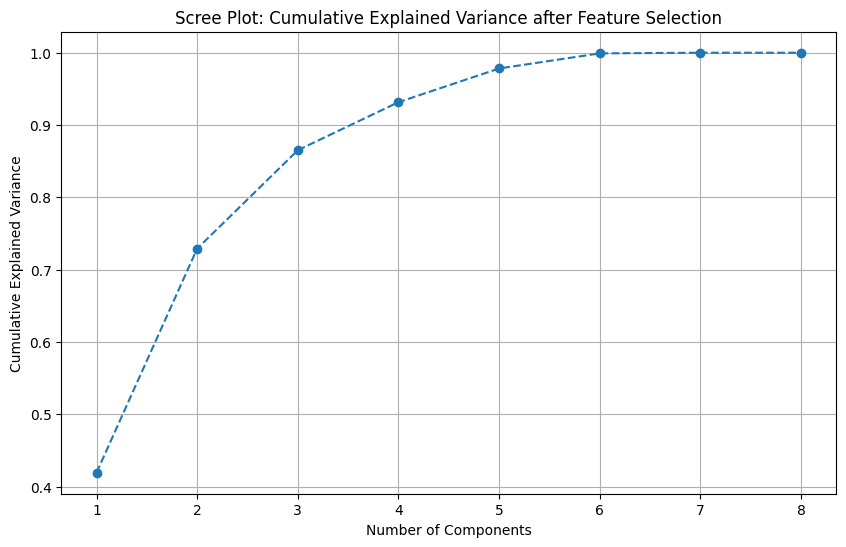

Number of components selected after feature selection: 5


2024/12/21 04:07:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7226156942954403 / 0.0341021415418161
Test F1-score: 0.7175572519083969
Confusion Matrix:
[[95 15]
 [22 47]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5/runs/090912a311b443d8aa8760b7c8fae1be
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5


2024/12/21 04:07:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.723671227829385 / 0.046637085730491426
Test F1-score: 0.734375
Confusion Matrix:
[[98 12]
 [22 47]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5/runs/faa62c9b34124f89aa2e506aac0019bc
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5


2024/12/21 04:08:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7192237299278015 / 0.06877229524576346
Test F1-score: 0.7313432835820896
Confusion Matrix:
[[94 16]
 [20 49]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5/runs/c86fac3ebe674d4b8ddffc94a4117c76
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/5


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Prepare features and target
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Handle missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
X[categorical_features] = X[categorical_features].fillna("Missing")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Feature Selection using SelectKBest
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=8)  # Selecting top 8 features

# PCA
pca = PCA()

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_6_Custom_Combined")

# Preprocess the training data
pipeline_preprocess = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_transformed = pipeline_preprocess.fit_transform(X_train)

# Feature selection
X_train_selected = kbest_selector.fit_transform(X_train_transformed, y_train)

# Fit PCA on the selected features
pca.fit(X_train_selected)

# Create a scree plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot: Cumulative Explained Variance after Feature Selection')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Select components explaining at least 95% of the variance
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components selected after feature selection: {n_components}")

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        try:
            # Create the pipeline for each classifier
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=8)),
                ('pca', PCA(n_components=n_components)),
                ('classifier', model)
            ])

            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_param("n_components", n_components)
            mlflow.log_param("selected_features", 8)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

In [ ]:
# Prepare features and target
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Handle missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
X[categorical_features] = X[categorical_features].fillna("Missing")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define base classifiers
base_classifiers = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42)),
    ('RidgeClassifier', RidgeClassifier(random_state=42))
]

# Define meta-classifier for stacking
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Create VotingClassifier (hard voting)
voting_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='hard'
)

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_Custom_Stacking_Voting")

# Evaluate classifiers
for name, model in [("StackingClassifier", stacking_classifier), ("VotingClassifier", voting_classifier)]:
    with mlflow.start_run(run_name=name):
        try:
            # Create the pipeline for each ensemble method
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")

2024/12/21 04:13:38 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_Custom_Stacking_Voting' does not exist. Creating a new experiment.
2024/12/21 04:14:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for StackingClassifier:
Cross-validation F1-score (mean/std): 0.7374903240193138 / 0.053639092389691244
Test F1-score: 0.7741935483870968
Confusion Matrix:
[[103   7]
 [ 21  48]]
🏃 View run StackingClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/6/runs/a90158c796f54ac08f7f4faada90081f
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/6


2024/12/21 04:14:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for VotingClassifier:
Cross-validation F1-score (mean/std): 0.7305221272443656 / 0.04876809057432595
Test F1-score: 0.736
Confusion Matrix:
[[100  10]
 [ 23  46]]
🏃 View run VotingClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/6/runs/d19cc2b016694fe6a4dcad4e195d57f4
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/6


In [ ]:
print(X_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.decomposition import PCA

,run_id,F1-Score,Run Name,Experiment
4,a90158c796f54ac08f7f4faada90081f,0.774194,StackingClassifier,Experiment_Custom_Stacking_Voting
28,f988f3a6163e4f8b8668e0325c255303,0.755556,LogisticRegression,Experiment_2_Titanic_Classifiers
25,8b7034254dc54dfcaf622577c4b94c58,0.755556,LogisticRegression,Experiment_2_Titanic_Classifiers
22,bbfc2a995eb84575bfdf48969b1937a9,0.755556,LogisticRegression,Experiment_2_Titanic_Classifiers
32,4c49a3ee224b4f75bc4a82265ad850ce,0.750000,RandomForestClassifier,Experiment_2_Titanic_Classifiers
...,...,...,...,...
8,7d3879e26f6842fca43da55f22194fed,0.708661,RandomForestClassifier,Experiment_5_Titanic_PCA
12,2d55a80c223a4944bae9e66d21de9016,0.702290,RidgeClassifier,Experiment_4_Titanic_Feature_Selection
0,94882c00ef3d4b91bdb26284cd49943b,0.631579,RandomForestClassifier,Model_Comparison
2,de141ec15a304f20b13a47fc5822cbb9,0.380000,LogisticRegression,Model_Comparison


<ipython-input-92-ee5d02ecf304>:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


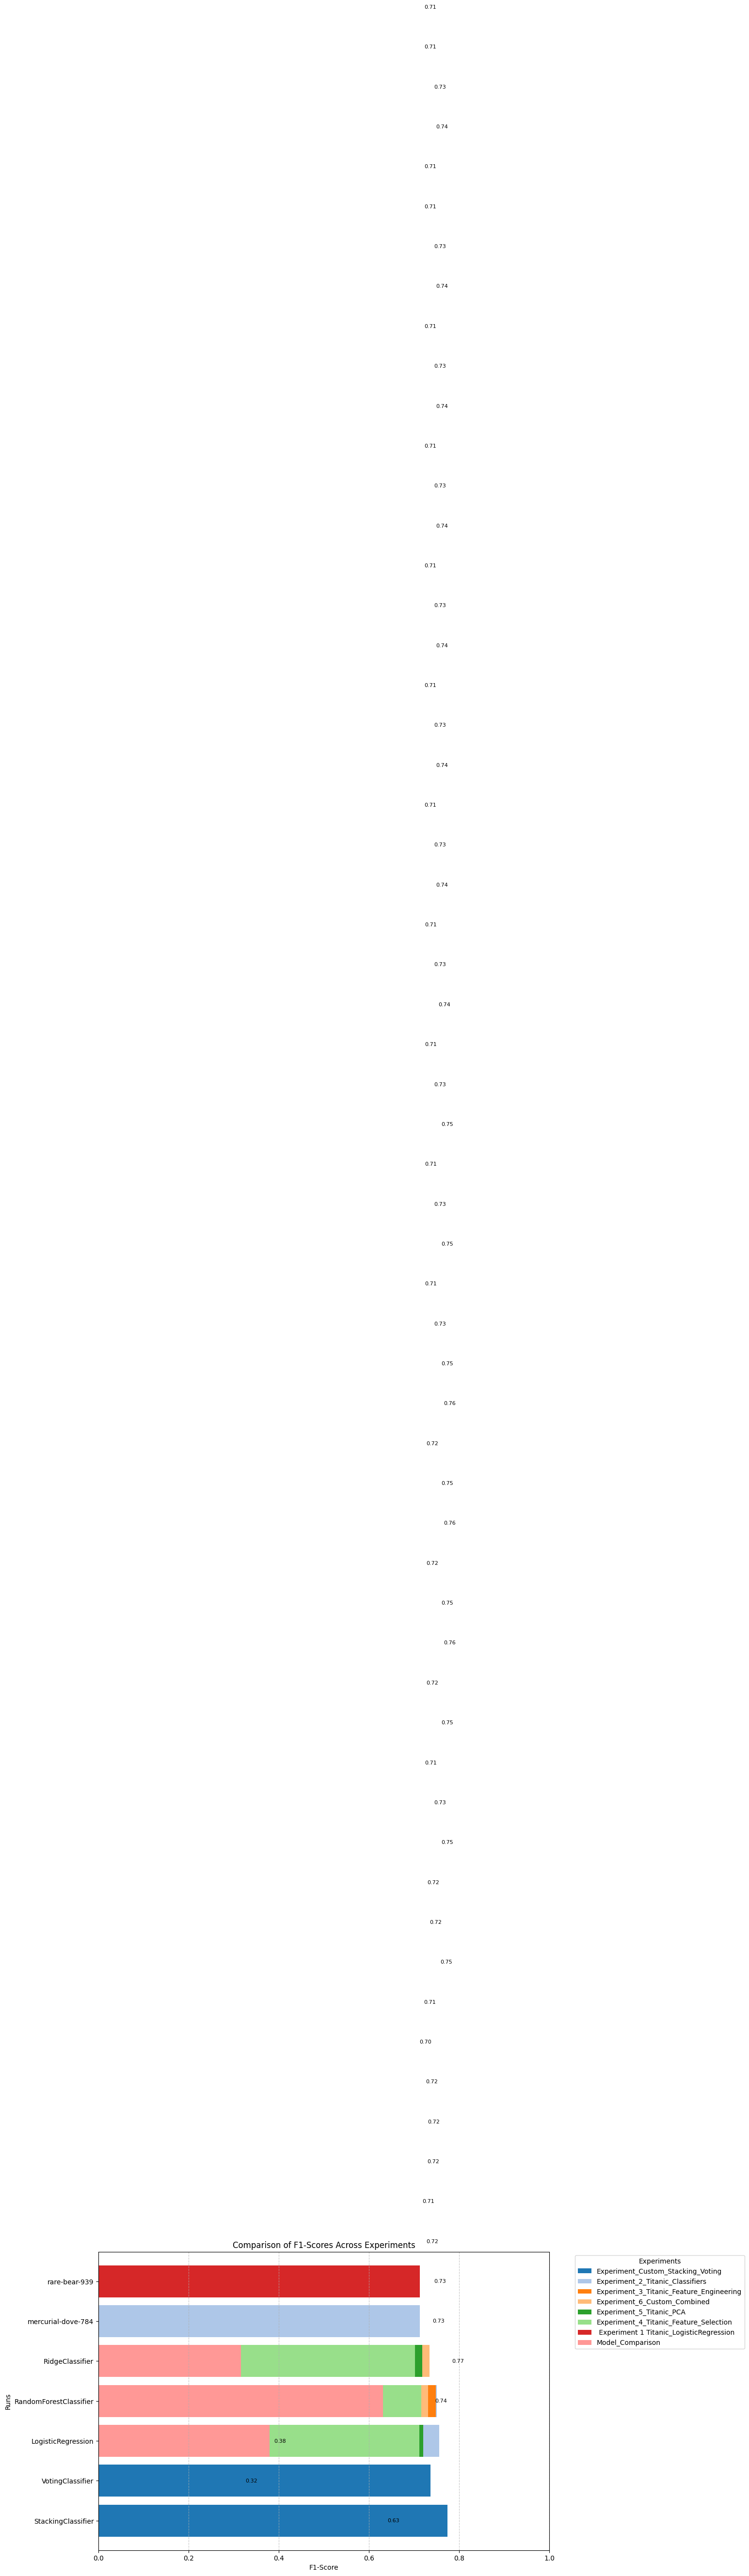

In [ ]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt

# Set the tracking URI for MLFlow
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")  # Replace with your MLFlow tracking server

# Fetch all experiments
experiments = mlflow.search_experiments()
all_f1_scores = []

# Loop through each experiment
for experiment in experiments:
    experiment_id = experiment.experiment_id
    experiment_name = experiment.name

    # Get all runs for the experiment
    runs = mlflow.search_runs(experiment_ids=[experiment_id])

    # Extract F1-scores and corresponding run names
    if "metrics.test_f1" in runs.columns:
        f1_scores = runs[["run_id", "metrics.test_f1", "tags.mlflow.runName"]].dropna()
        f1_scores = f1_scores.rename(
            columns={
                "metrics.test_f1": "F1-Score",
                "tags.mlflow.runName": "Run Name"
            }
        )
        f1_scores["Experiment"] = experiment_name
        all_f1_scores.append(f1_scores)

# Combine F1-scores from all experiments
if all_f1_scores:
    combined_f1_scores = pd.concat(all_f1_scores, ignore_index=True)
else:
    raise ValueError("No F1-scores found in any experiments.")

# Sort by F1-Score for better visualization
combined_f1_scores = combined_f1_scores.sort_values(by="F1-Score", ascending=False)

# Display the F1-scores
display(combined_f1_scores)  # Show a table of combined F1-scores

# Plot the F1-scores
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors  # Use a colormap for distinct experiment colors

# Create a grouped bar chart for F1-scores
for idx, experiment_name in enumerate(combined_f1_scores["Experiment"].unique()):
    exp_data = combined_f1_scores[combined_f1_scores["Experiment"] == experiment_name]
    plt.barh(exp_data["Run Name"], exp_data["F1-Score"], label=experiment_name, color=colors[idx % len(colors)])

plt.xlabel("F1-Score")
plt.ylabel("Runs")
plt.title("Comparison of F1-Scores Across Experiments")
plt.legend(title="Experiments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xlim(0, 1)  # F1-scores range between 0 and 1

# Annotate bars with F1-scores
for index, row in combined_f1_scores.iterrows():
    plt.text(row["F1-Score"] + 0.01, index, f"{row['F1-Score']:.2f}", va="center", fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
import joblib

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming stacking_model is your trained StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the base learners and the meta-model for stacking (use your model configuration)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Define a pipeline with preprocessing and stacking model
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Add scaling step
    ("model", stacking_model)      # Add the stacking classifier
])

# Train the pipeline
pipeline.fit(X_train_selected, y_train)

# Save the entire pipeline
joblib.dump(pipeline, "stacking_classifier_model.pkl")

print("StackingClassifier pipeline saved as 'stacking_classifier_model.pkl'")


StackingClassifier pipeline saved as 'stacking_classifier_model.pkl'


In [ ]:
!pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
print("FastAPI installed successfully!")


FastAPI installed successfully!


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the Stacking Classifier model
model = joblib.load("stacking_classifier_model.pkl")

# Initialize FastAPI app
app = FastAPI()

# Define the input data model
class ModelInput(BaseModel):
    Pclass: int
    Age: float
    SibSp: int
    Parch: int
    Fare: float
    Sex: str
    Embarked: str

# Map categorical features to numeric codes for prediction
def preprocess_input(data: ModelInput):
    sex_map = {"male": 0, "female": 1}
    embarked_map = {"C": 0, "Q": 1, "S": 2}

    # Convert input to numeric format
    return np.array([
        data.Pclass,
        data.Age,
        data.SibSp,
        data.Parch,
        data.Fare,
        sex_map[data.Sex],
        embarked_map[data.Embarked]
    ]).reshape(1, -1)

# Define the prediction route
@app.post("/predict")
async def predict(input_data: ModelInput):
    try:
        # Preprocess input
        processed_data = preprocess_input(input_data)

        # Make prediction
        prediction = model.predict(processed_data)
        probability = model.predict_proba(processed_data).max()

        return {
            "prediction": int(prediction[0]),
            "probability": float(probability)
        }
    except Exception as e:
        return {"error": str(e)}


